In [2]:
import numpy as np
les_per_class = 1000
negative_samples = np.random.multivariate_normal( 
 mean=[0, 3], 
 cov=[[1, 0.5],[0.5, 1]], 
 size=num_samples_per_class) 
positive_samples = np.random.multivariate_normal( 
 mean=[3, 0], 
 cov=[[1, 0.5],[0.5, 1]], 
 size=num_samples_per_class)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [4]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
 np.ones((num_samples_per_class, 1), dtype="float32")))

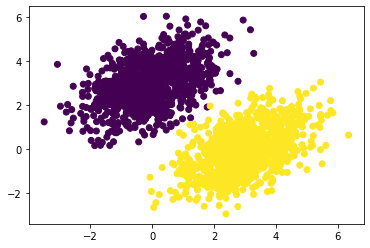

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [6]:
import tensorflow as tf
input_dim = 2
output_dim = 1 
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [7]:
def model(inputs):
 return tf.matmul(inputs, W) + b

In [14]:
def square_loss(targets, predictions):
 per_sample_losses = tf.square(targets - predictions) 
 return tf.reduce_mean(per_sample_losses)

In [10]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape: 
    predictions = model(inputs) 
    loss = square_loss(predictions, targets) 
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
  W.assign_sub(grad_loss_wrt_W * learning_rate) 
  b.assign_sub(grad_loss_wrt_b * learning_rate) 
  return loss

In [15]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.7448
Loss at step 1: 0.5944
Loss at step 2: 0.1993
Loss at step 3: 0.1510
Loss at step 4: 0.1368
Loss at step 5: 0.1267
Loss at step 6: 0.1177
Loss at step 7: 0.1096
Loss at step 8: 0.1021
Loss at step 9: 0.0954
Loss at step 10: 0.0892
Loss at step 11: 0.0836
Loss at step 12: 0.0785
Loss at step 13: 0.0738
Loss at step 14: 0.0695
Loss at step 15: 0.0656
Loss at step 16: 0.0621
Loss at step 17: 0.0589
Loss at step 18: 0.0559
Loss at step 19: 0.0532
Loss at step 20: 0.0508
Loss at step 21: 0.0485
Loss at step 22: 0.0465
Loss at step 23: 0.0447
Loss at step 24: 0.0430
Loss at step 25: 0.0414
Loss at step 26: 0.0400
Loss at step 27: 0.0387
Loss at step 28: 0.0376
Loss at step 29: 0.0365
Loss at step 30: 0.0355
Loss at step 31: 0.0346
Loss at step 32: 0.0338
Loss at step 33: 0.0331
Loss at step 34: 0.0324
Loss at step 35: 0.0318
Loss at step 36: 0.0313
Loss at step 37: 0.0308
Loss at step 38: 0.0303
Loss at step 39: 0.0299


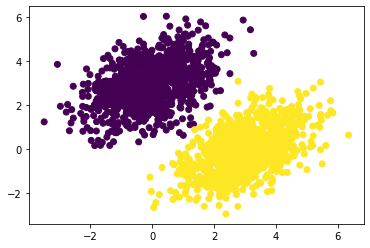

In [17]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

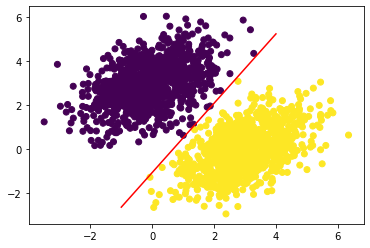

In [18]:
x = np.linspace(-1, 4, 100) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r") 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)